# Inteligencia Artificial - Classificação Supervisionada usando Scikit Learn
### Informações dos 9 atributos de entrada e 1 coluna de classe:

#### I0 Impedancia (ohm) na frequência zero
#### Ângulo de fase PA500 a 500 KHz
#### Inclinação de alta frequência HFS do ângulo de fase
#### DA distância de impedância entre as extremidades espectrais
#### AREA área sob espectro
#### Área A/DA normalizada por DA
#### MAX IP máximo do espectro
#### Distância DR entre I0 e parte real do ponto de frequência máxima
#### P comprimento da curva espectral
#### Classes: car(carcinoma), fad (fibro-adenoma), mas (mastopatia), gla (glandular), con (conjuntivo), adi (adiposo).

##### Fonte:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Dataset: Breast Tissue Data Set


In [1]:
#Instalando as bibliotecas:
#!pip install xlrd
#!pip install openpyxl
#!pip install seaborn
#!pip install scikit.learn


In [2]:
# Importando a base de dados e analisando os dados:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tabela = pd.read_excel("BreastTissue.xls", sheet_name="Data")
tabela = tabela.drop("Case #", axis=1) 

tabela['Class'] = tabela['Class'].apply(lambda x: x.replace('car', '0').replace('fad', '1').replace('mas', '2').replace('gla', '3').replace('con', '4').replace('adi', '5'))
tabela['Class'] = tabela['Class'].astype(int)


#print(tabela.head(10)) # verificando as 10 primeiras linhas 
print(tabela.info()) # verificando o tipo das variáveis entre outras informações

y = tabela["Class"]
x = tabela.drop("Class", axis=1)
#print(x.head(5))
#print(y.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   106 non-null    int64  
 1   I0      106 non-null    float64
 2   PA500   106 non-null    float64
 3   HFS     106 non-null    float64
 4   DA      106 non-null    float64
 5   Area    106 non-null    float64
 6   A/DA    106 non-null    float64
 7   Max IP  106 non-null    float64
 8   DR      106 non-null    float64
 9   P       106 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 8.4 KB
None


![Picture title](image-20230129-165420.png)

<function matplotlib.pyplot.show(close=None, block=None)>

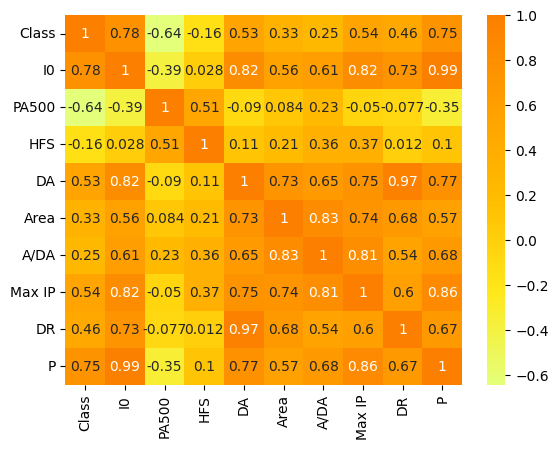

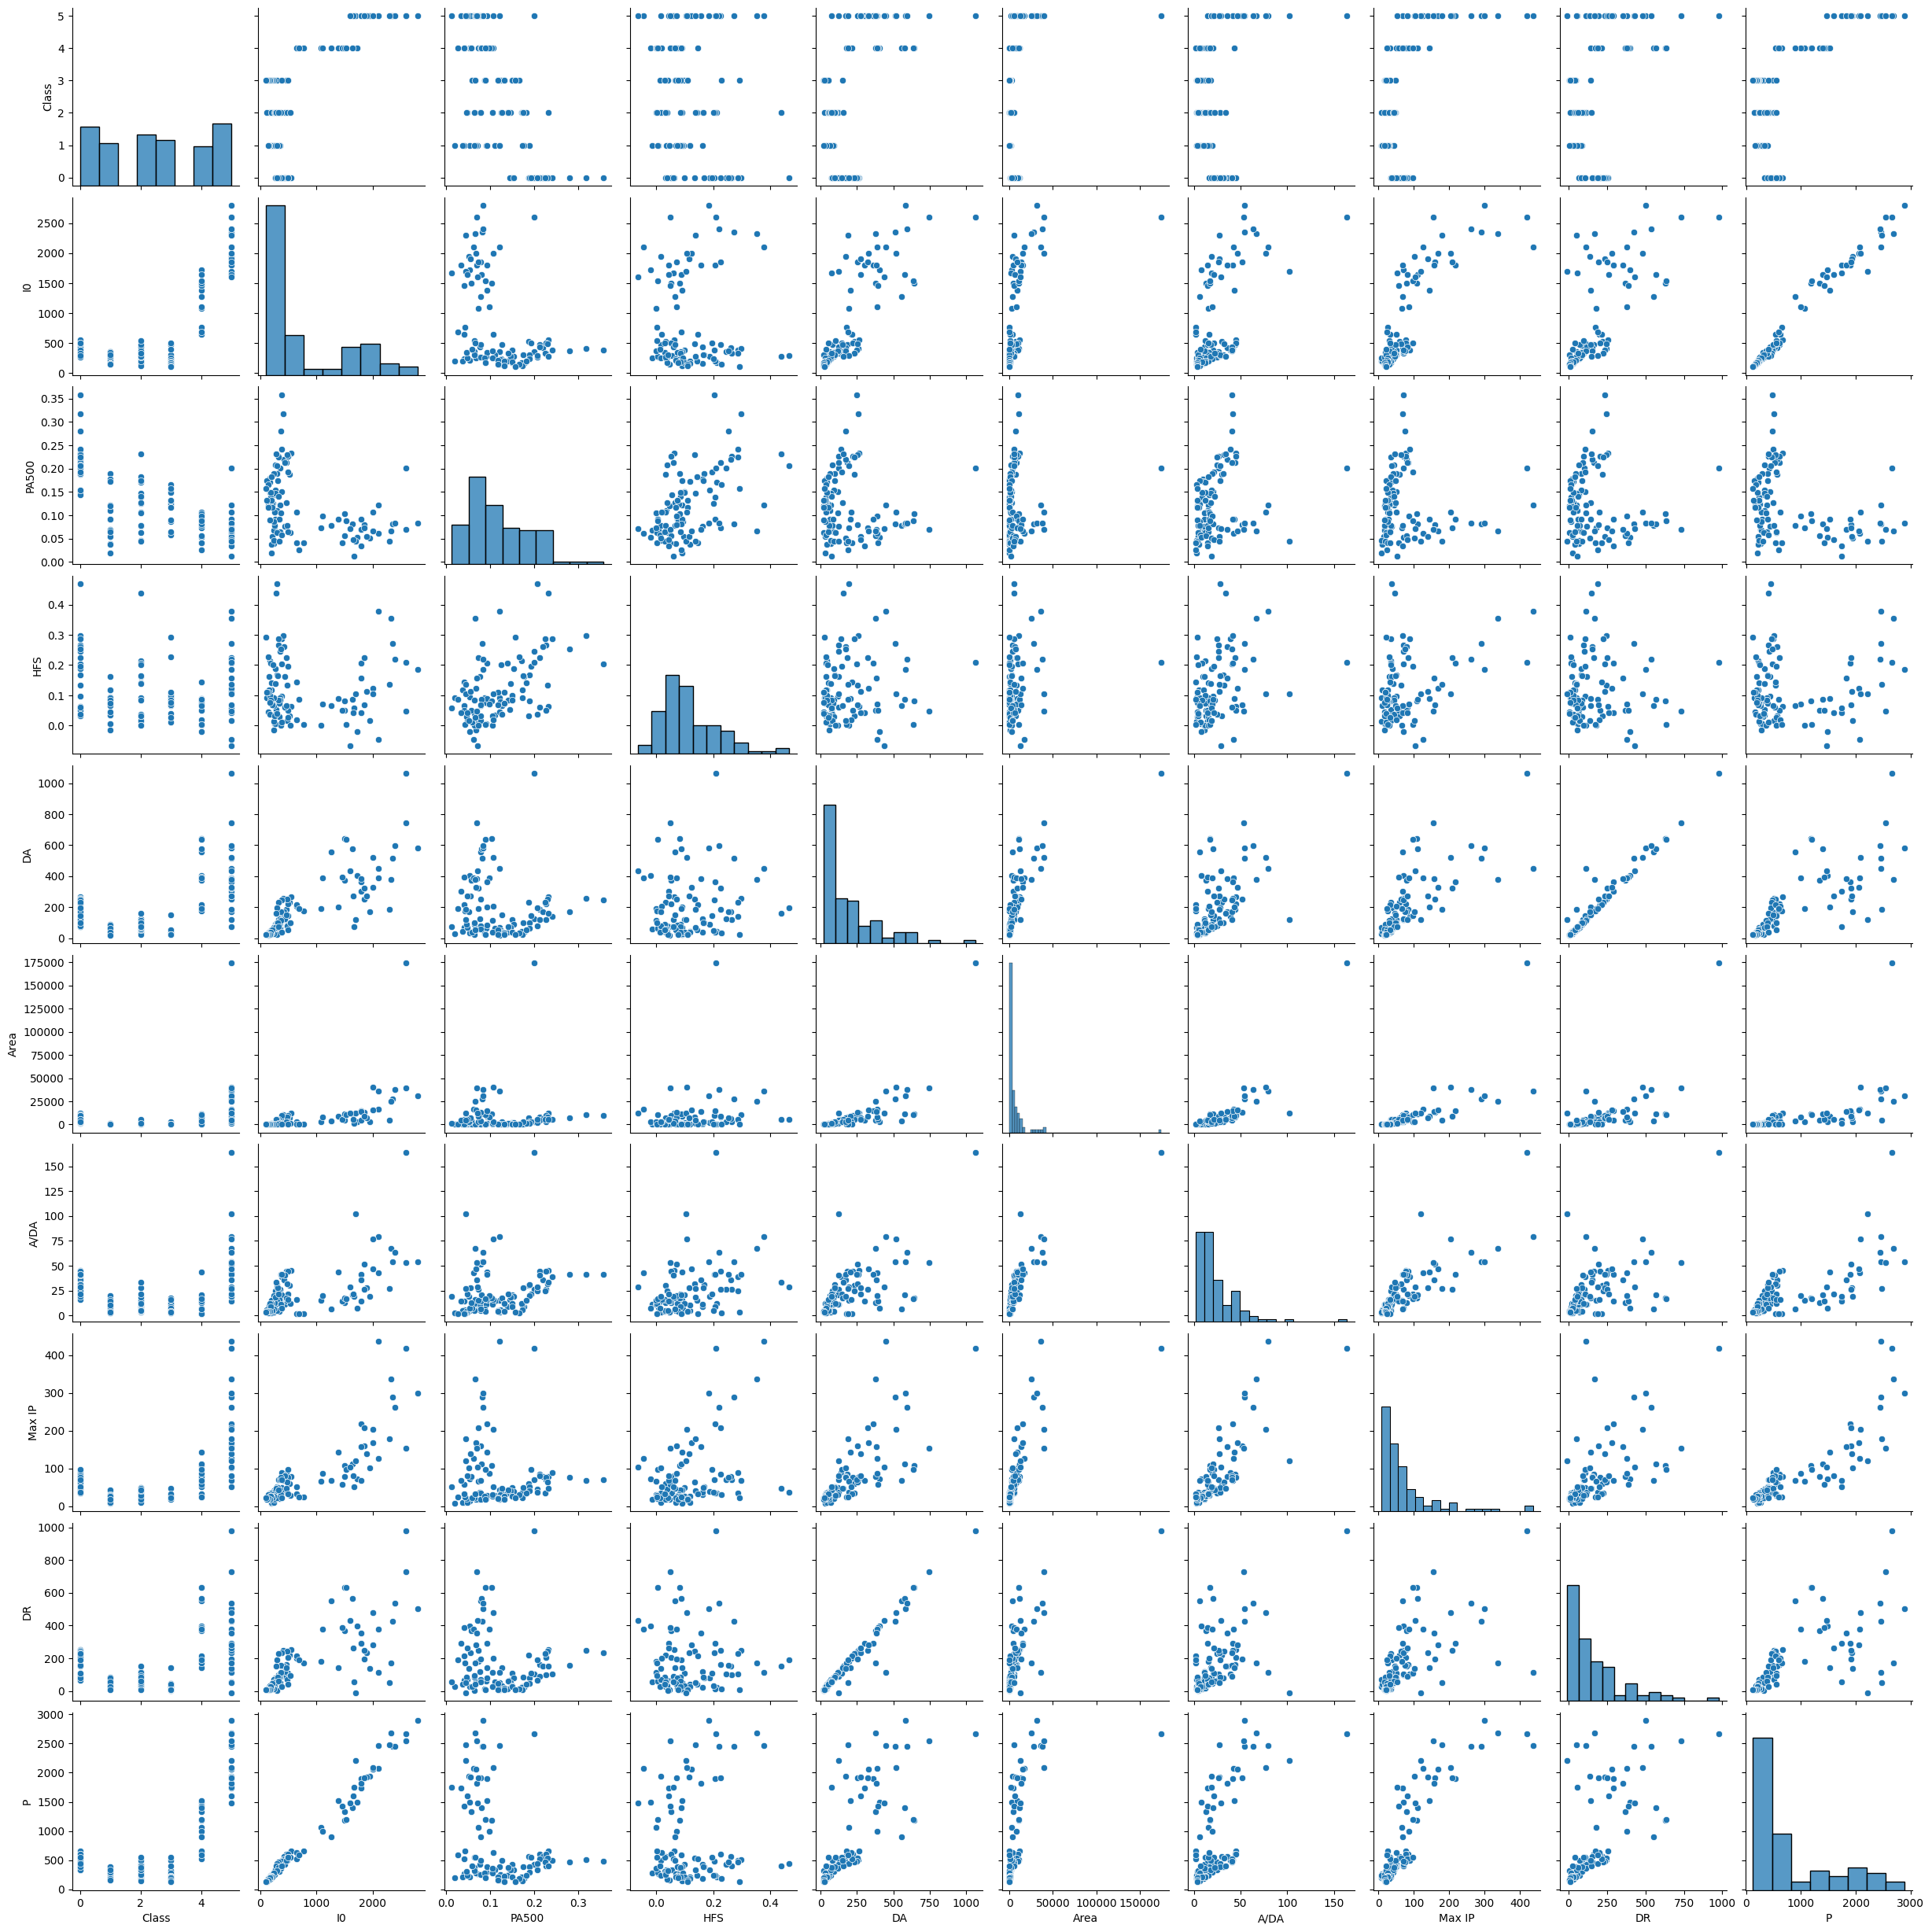

In [3]:
#Análise Exploratória
#print(f"Matriz Correlação \n {tabela.corr()}")
sns.heatmap(tabela.corr(), cmap="Wistia", annot= True)
sns.pairplot(tabela)
plt.show


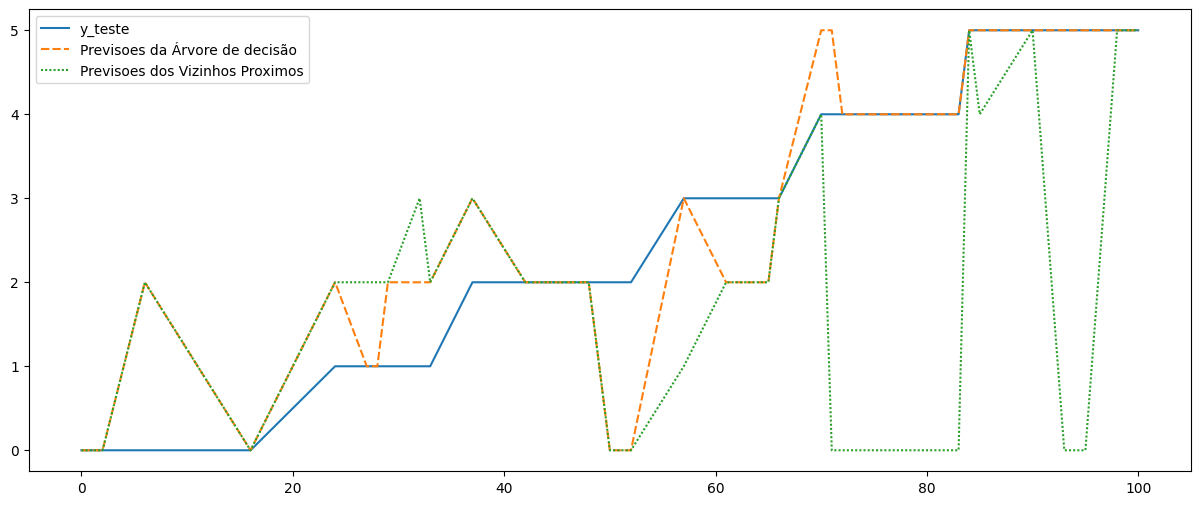

Comparando os modelos de Machine Learning,
 a metrica Acuracia da Arvore de Decisão foi de 62.50% e 
 Vizinhos Proximos foi de 37.50%


In [14]:
# Usando agora a inteligencia artificial com o metodos de machine learning
# Vamos escolher o melhor modelo para prever o comportamento de novos dados:

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier #Arvore de Decisão
from sklearn.neighbors import KNeighborsClassifier # Vizinhos Proximos

# cria as inteligencias aritificiais
modelo_arvoredecisao = RandomForestClassifier()
modelo_vizinhosproximos = KNeighborsClassifier()


# Treinamento da inteligencia artificial
modelo_arvoredecisao.fit(x_treino, y_treino)
modelo_vizinhosproximos.fit(x_treino, y_treino) 

# Testando a IA 
testando_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
testando_vizinhosproximos = modelo_vizinhosproximos.predict(x_teste)


#Visualizando a previsão:
resultado = pd.DataFrame()
resultado["y_teste"] = y_teste
resultado["Previsoes da Árvore de decisão"] = testando_arvoredecisao
resultado["Previsoes dos Vizinhos Proximos"] = testando_vizinhosproximos 
#print(resultado)

plt.figure(figsize=(15,6))
sns.lineplot(data=resultado)
plt.show()

#Avaliando as IA
import numpy as np
from sklearn.metrics import accuracy_score

# Calculando a acurácia
acuracia_arvoredecisao = accuracy_score(y_teste, testando_arvoredecisao) 
acuracia_vizinhosproximos = accuracy_score(y_teste, testando_vizinhosproximos)

print(f"Comparando os modelos de Machine Learning,\n a metrica Acuracia da Arvore de Decisão foi de {acuracia_arvoredecisao :.2%} e \n Vizinhos Proximos foi de {acuracia_vizinhosproximos:.2%}")




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=61fcd0ae-07a0-4872-b40d-3a79cdbc3203' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>